In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('application_record.csv')
df = pd.DataFrame(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [82]:
df.shape

(438557, 19)

In [8]:
df[df.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS


In [9]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
STATUS                 402100
dtype: int64

In [4]:
df.dropna(subset = ['OCCUPATION_TYPE'],inplace = True , ignore_index= True)

In [84]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
STATUS                 279220
dtype: int64

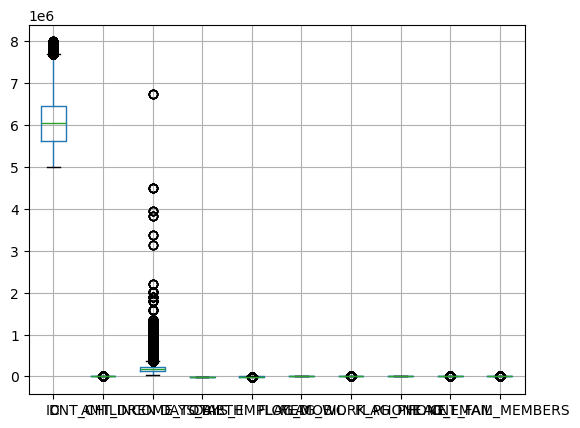

In [22]:
df.boxplot()
plt.show()

In [5]:
test = df[df['STATUS'].isna()]

In [6]:
train = df[df['STATUS'].notna()]

In [28]:
test.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
STATUS                 279220
dtype: int64

In [27]:
train.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
train.shape , test.shape

((25134, 19), (279220, 19))

In [9]:
X_train = train.iloc[: , train.columns != 'STATUS']
y_train = train[['STATUS']]

In [10]:
X_test = test.iloc[: , test.columns != 'STATUS']
y_test = test[['STATUS']]

In [11]:
for col in X_train.columns:
    if X_train[col].dtypes == 'object':
        X_train[col] = LabelEncoder().fit_transform(X_train[col])

In [12]:
for col in X_test.columns:
    if X_test[col].dtypes == 'object':
        X_test[col] = LabelEncoder().fit_transform(X_test[col])

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.metrics import accuracy_score

In [14]:
dtr = DecisionTreeClassifier(random_state=42)
param = {'criterion': ['gini' , 'entropy'] , 
        'max_depth': range(1,16)}
gscv = GridSearchCV(dtr , param , scoring= 'accuracy' , cv= 5)
gscv.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 16)},
             scoring='accuracy')

In [15]:
dt = gscv.best_estimator_

In [16]:
dt

DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
gscv.feature_names_in_

array(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype=object)

In [18]:
dt.fit(X_train , y_train)
score = cross_val_score(dt , X_train , y_train , scoring='accuracy' , cv=5).mean()
pred = dt.predict(X_test)

In [19]:
score

0.49013288449297787

In [20]:
ypred = dt.predict(X_train)
accuracy = accuracy_score(y_train , ypred)

In [21]:
accuracy

0.4901328877218111

In [22]:
pred

array(['C', 'C', 'C', ..., 'C', 'C', 'C'], dtype=object)

In [23]:
X_test.index

Index([     7,     35,     36,     37,     53,     57,    123,    124,    125,
          149,
       ...
       304344, 304345, 304346, 304347, 304348, 304349, 304350, 304351, 304352,
       304353],
      dtype='int64', length=279220)

In [24]:
ts = pd.DataFrame(pred , index = X_test.index , columns = ['STATUS'])

In [25]:
ts.nunique()

STATUS    1
dtype: int64

In [26]:
ts.value_counts()

STATUS
C         279220
Name: count, dtype: int64

In [27]:
X_test

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
7,6153651,1,1,1,0,270000.0,4,1,1,1,-16872,-769,1,1,1,1,0,2
35,6153733,1,1,1,0,112500.0,0,4,1,1,-20502,-4450,1,0,1,0,4,2
36,6153734,1,1,1,0,112500.0,0,4,1,1,-20502,-4450,1,0,1,0,4,2
37,6153735,1,1,1,0,112500.0,0,4,1,1,-20502,-4450,1,0,1,0,4,2
53,6153736,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304349,6837707,1,0,1,0,202500.0,4,1,0,1,-13510,-2309,1,1,0,0,8,2
304350,6839936,1,1,1,1,135000.0,4,4,1,1,-12569,-2095,1,0,0,0,8,3
304351,6840222,0,0,0,0,103500.0,4,4,3,1,-15939,-3007,1,0,0,0,8,1
304352,6841878,0,0,0,0,54000.0,0,1,3,5,-8169,-372,1,1,0,0,14,1


In [28]:
pd.merge(X_test , ts , how ='left' , left_index= True , right_index= True )

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
7,6153651,1,1,1,0,270000.0,4,1,1,1,-16872,-769,1,1,1,1,0,2,C
35,6153733,1,1,1,0,112500.0,0,4,1,1,-20502,-4450,1,0,1,0,4,2,C
36,6153734,1,1,1,0,112500.0,0,4,1,1,-20502,-4450,1,0,1,0,4,2,C
37,6153735,1,1,1,0,112500.0,0,4,1,1,-20502,-4450,1,0,1,0,4,2,C
53,6153736,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,8,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304349,6837707,1,0,1,0,202500.0,4,1,0,1,-13510,-2309,1,1,0,0,8,2,C
304350,6839936,1,1,1,1,135000.0,4,4,1,1,-12569,-2095,1,0,0,0,8,3,C
304351,6840222,0,0,0,0,103500.0,4,4,3,1,-15939,-3007,1,0,0,0,8,1,C
304352,6841878,0,0,0,0,54000.0,0,1,3,5,-8169,-372,1,1,0,0,14,1,C


In [29]:
df['STATUS'].fillna('C',inplace = True)

In [30]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [31]:
df.shape

(304354, 19)

In [34]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
STATUS                  object
dtype: object

In [29]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,C
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,X
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,C
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,C


In [43]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [32]:
df1 = df.copy()

In [33]:
df['TARGET'] = 'NAN'

In [34]:
df['TARGET'] = np.where(df['STATUS'] == 'X' , 'approve' , df['TARGET'])

In [35]:
df['TARGET'] = np.where(df['STATUS'] == 'C' , 'approve' , df['TARGET'])

In [36]:
df['TARGET'] = np.where(df['STATUS'] == '0' , 'approve' , df['TARGET'])

In [37]:
df['TARGET'] = np.where(df['STATUS'] == '1' , 'notapprove' , df['TARGET'])

In [38]:
df['TARGET'] = np.where(df['STATUS'] == '2' , 'notapprove' , df['TARGET'])

In [39]:
df['TARGET'] = np.where(df['STATUS'] == '3' , 'notapprove' , df['TARGET'])

In [40]:
df['TARGET'] = np.where(df['STATUS'] == '4' , 'notapprove' , df['TARGET'])

In [41]:
df['TARGET'] = np.where(df['STATUS'] == '5' , 'notapprove' , df['TARGET'])

In [42]:
df['TARGET'] = np.where(df['STATUS'] == '6' , 'notapprove' , df['TARGET'])

In [43]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,C,approve
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0,approve
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,X,approve
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,C,approve
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,C,approve


In [44]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
STATUS                  object
TARGET                  object
dtype: object

In [45]:
df['STATUS'] = df['STATUS'].astype('str')

In [46]:
df.drop(['CODE_GENDER'],axis = 1 , inplace= True)

In [48]:
X = df.iloc[: , df.columns != 'TARGET']
y = df[['TARGET']]

In [49]:
for col in X.columns:
    if X[col].dtypes == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

In [50]:
y.value_counts()

TARGET    
approve       304073
notapprove       281
Name: count, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
X_re , y_re = SMOTE(random_state=42).fit_resample(X , y)

In [53]:
y_re.value_counts()

TARGET    
approve       304073
notapprove    304073
Name: count, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

In [55]:
X_train , X_test , y_train , y_test =train_test_split(X_re , y_re , test_size=0.4 , random_state=71)

In [56]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier

In [ ]:
ac = AdaBoostClassifier()
param = {'n_estimators': [20 , 30 , 70] , 
        'learning_rate':[0.001, 0.5 , 0.1,1,10,100,0.8]}
gscv = GridSearchCV(ac , param , scoring='accuracy' , cv = 5 )
gscv.fit(X_train , y_train)

In [57]:
ac = AdaBoostClassifier()

In [58]:
ac.fit(X_train , y_train)

AdaBoostClassifier()

In [59]:
yp = ac.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test , yp)

In [61]:
accuracy

1.0

In [62]:
ga = GradientBoostingClassifier()

In [63]:
ga.fit(X_train , y_train)

GradientBoostingClassifier()

In [64]:
ypg = ga.predict(X_test)

In [65]:
accuracyg = accuracy_score(y_test , ypg)
accuracyg

1.0

In [ ]:
## by using voting classifier

In [66]:
from sklearn.ensemble import VotingClassifier

In [67]:
vc = VotingClassifier([('dt' , DecisionTreeClassifier()) , 
                      ('ab' , AdaBoostClassifier()) ,
                      ('gb' , GradientBoostingClassifier())])

In [68]:
vc.fit(X_train , y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('ab', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())])

In [69]:
vp = vc.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test , vp)

In [71]:
accuracy

1.0

In [72]:
vpp = pd.DataFrame(vp)

In [73]:
vpp.value_counts()

approve       121978
notapprove    121281
Name: count, dtype: int64

In [74]:
from sklearn.metrics import classification_report

In [75]:
cm = classification_report(y_test , vp)

In [76]:
print(cm)

              precision    recall  f1-score   support

     approve       1.00      1.00      1.00    121978
  notapprove       1.00      1.00      1.00    121281

    accuracy                           1.00    243259
   macro avg       1.00      1.00      1.00    243259
weighted avg       1.00      1.00      1.00    243259

